# Useful librairies

In [307]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import date, timedelta

matplotlib.rcParams["figure.facecolor"] = "white"
pd.set_option('display.max_columns', None)

# EDA

## Data Overview

In [308]:
#create a dataframe from the csv file Time_Value_CM.csv 
df = pd.read_csv('Time_Value_CM.csv', names=['Date', 'Value'])
df.head()

,Date,Value
0,2022-05-02T00:01:00Z,178961.742
1,2022-05-02T00:02:00Z,170609.878
2,2022-05-02T00:03:00Z,168829.864
3,2022-05-02T00:04:00Z,173252.734
4,2022-05-02T00:05:00Z,177271.117


In [309]:
#convert the date column to datetime format 
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%dT%H:%M:%SZ")
df.sort_values(by='Date', inplace=True)

In [310]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.dayofweek.astype(int)
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df['Second'] = df['Date'].dt.second

In [311]:
df.head()


,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second
79143,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0
79144,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0
79145,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0
79146,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0
79147,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0


In [312]:
#drop second
df.drop(['Second'], axis=1, inplace=True)

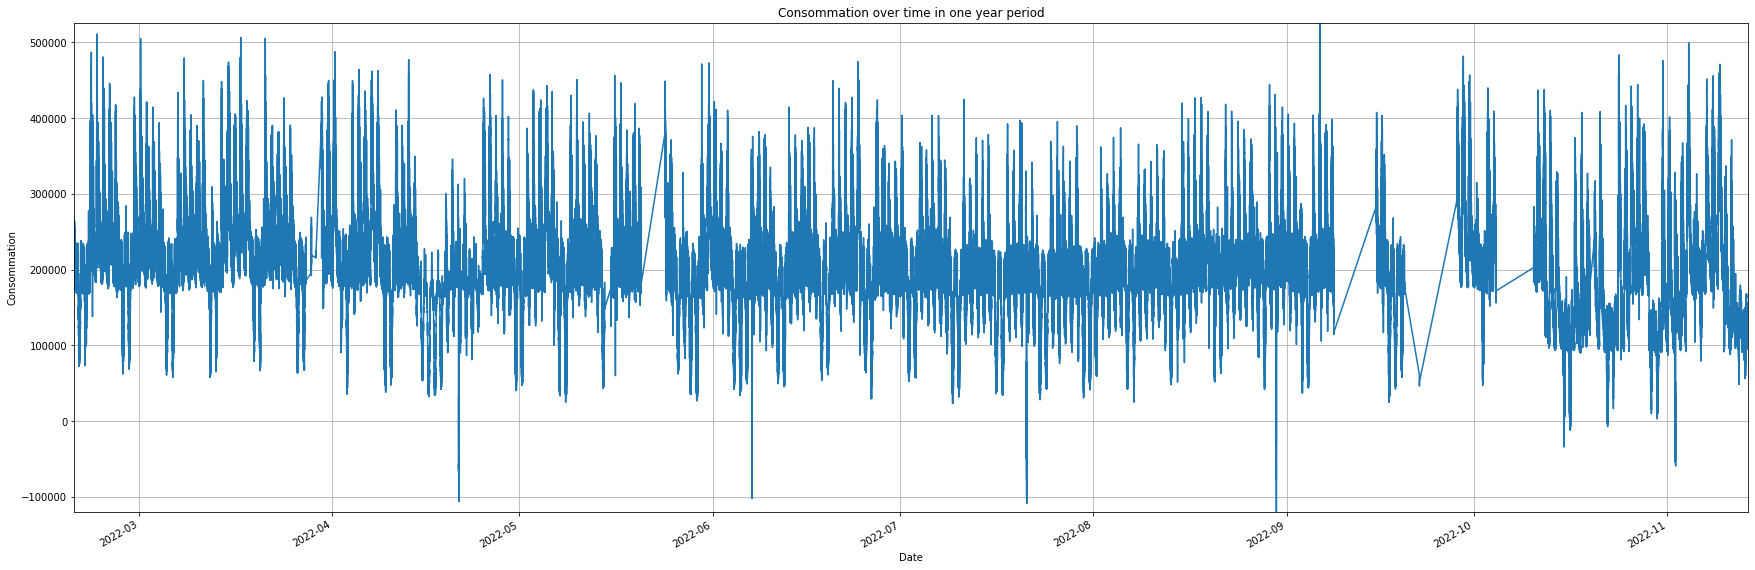

In [313]:
def plot_consommation_over_time_detailed_graph(): 
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time in one year period')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_detailed_graph()

## Replacing missing data

In [314]:
sdate = date(2022,2,19) 
edate = date(2022,11,13)
all_days = pd.date_range(sdate,edate-timedelta(days=1),freq='d')
all_days = pd.to_datetime(all_days, format="%Y-%m-%d")

In [315]:
days_missing = []
for x in all_days:
    month_x = x.month
    day_x = x.day
    if (df.loc[(df.Month == month_x) & (df.Day == day_x)].shape[0] == 0) :
        days_missing.append(x)

In [316]:
missing_perc = round((len(days_missing)*100)/len(all_days), 2)
print("We have ", missing_perc, "% of complete days missing values.")

We have  7.87 % of complete days missing values.


In [317]:
for miss_day in days_missing:
    prev_week = miss_day - dt.timedelta(days = 7)
    next_week = miss_day + dt.timedelta(days = 7)
    if (df.loc[(df.Month == prev_week.month) & (df.Day == prev_week.day)].shape[0] != 0) :
        df_concat = df.loc[(df.Month == prev_week.month) & (df.Day == prev_week.day)]
        df_concat["Date"] = df_concat["Date"] + dt.timedelta(days = 7)
        df = pd.concat([df, df_concat], ignore_index=True)
    else: 
        if (df.loc[(df.Month == next_week.month) & (df.Day == next_week.day)].shape[0] != 0) :
            df_concat = df.loc[(df.Month == next_week.month) & (df.Day == next_week.day)]
            df_concat["Date"] = df_concat["Date"] - dt.timedelta(days = 7)
            df = pd.concat([df, df_concat], ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17012\3680481499.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Date"] = df_concat["Date"] + dt.timedelta(days = 7)
C:\Users\User\AppData\Local\Temp\ipykernel_17012\3680481499.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat["Date"] = df_concat["Date"] - dt.timedelta(days = 7)


In [318]:
days_missing = []
for x in all_days:
    month_x = x.month
    day_x = x.day
    if (df.loc[(df.Month == month_x) & (df.Day == day_x)].shape[0] == 0) :
        days_missing.append(x)

In [319]:
missing_perc = round((len(days_missing)*100)/len(all_days), 2)
print("We now have", missing_perc, "% of complete days missing values.")

We now have 7.87 % of complete days missing values.


In [320]:
#sort
df.sort_values(by='Date', inplace=True)

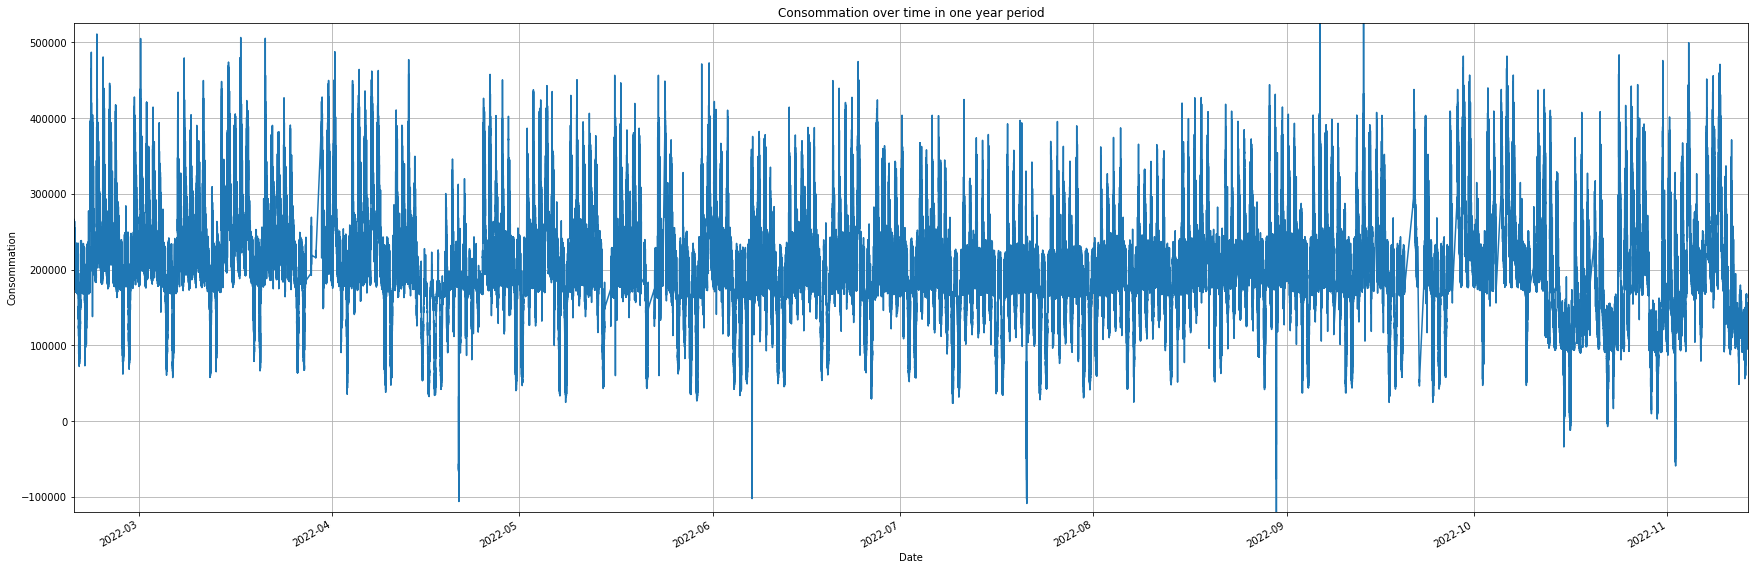

In [321]:
def plot_consommation_over_time_detailed_graph(): 
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time in one year period')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_detailed_graph()

## Adding Irradiance Data

In [322]:
df_irr = pd.read_csv('radiation_data.csv', sep=';')
df_irr = df_irr.drop(df_irr.columns[0], axis=1)
df_irr['Date'] = pd.to_datetime(df_irr['Date'], format='%Y%m%d%H%M')
df_irr.head()

,Date,Irradiance
0,2022-01-01 00:00:00,0
1,2022-01-01 00:10:00,0
2,2022-01-01 00:20:00,0
3,2022-01-01 00:30:00,0
4,2022-01-01 00:40:00,0


In [323]:
df_nan= df_irr[df_irr['Irradiance']=='-']
df_nan = df_nan.replace('-', np.nan)
df_nan_index = df_nan.index.tolist()
# replace these specific indexes in the original df by nan values
df_irr.loc[df_nan_index, 'Irradiance'] = np.nan

In [324]:
df_irr.head()
#df_irr['Irradiance'] = df_irr['Irradiance'].astype(float)

#add between each data the missing values for the minute
df_irr = df_irr.set_index('Date')
df_irr = df_irr.resample('1min').asfreq()
df_irr = df_irr.reset_index()

# convert Irradiance to float
df_irr['Irradiance'] = df_irr['Irradiance'].str.replace(',', '.').astype(float)
df_irr.head()

,Date,Irradiance
0,2022-01-01 00:00:00,0.0
1,2022-01-01 00:01:00,NaN
2,2022-01-01 00:02:00,NaN
3,2022-01-01 00:03:00,NaN
4,2022-01-01 00:04:00,NaN


In [325]:
# for the nan values we will use the first value before the nan value that is not nan
df_irr['Irradiance'] = df_irr['Irradiance'].fillna(method='ffill')

In [326]:
df_irr = df_irr[(df_irr['Date'] >= df['Date'].min()) & (df_irr['Date'] <= df['Date'].max())]

In [327]:
df_irr.head()

,Date,Irradiance
70059,2022-02-18 15:39:00,134.0
70060,2022-02-18 15:40:00,134.0
70061,2022-02-18 15:41:00,134.0
70062,2022-02-18 15:42:00,134.0
70063,2022-02-18 15:43:00,134.0


In [328]:
df = pd.merge(df, df_irr, on='Date')

In [329]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Irradiance
0,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,134.0
1,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,134.0
2,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,134.0
3,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,134.0
4,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,134.0


## Add Temperature Data

In [330]:
df_temp = pd.read_csv('temperature_data.csv', sep=';', names= ['Station','Date', 'Temperature'])

In [331]:
df_temp = df_temp.drop(df.index[0])
#drop the station column
df_temp = df_temp.drop(['Station'], axis=1)
df_temp['Date'] = pd.to_datetime(df_temp['Date'], format='%Y%m%d%H%M')
df_temp.head()

,Date,Temperature
1,2022-01-01 00:00:00,8.6
2,2022-01-01 00:10:00,8.7
3,2022-01-01 00:20:00,8.7
4,2022-01-01 00:30:00,8.9
5,2022-01-01 00:40:00,8.6


In [332]:
df_nan= df_temp[df_temp['Temperature']=='-']
df_nan = df_nan.replace('-', np.nan)
df_nan_index = df_nan.index.tolist()
# replace these specific indexes in the original df by nan values
df_temp.loc[df_nan_index, 'Temperature'] = np.nan

In [333]:
df_temp.head()
df_temp['Temperature'] = df_temp['Temperature'].astype(float)

#add between each data the missing values for the minute
df_temp = df_temp.set_index('Date')
df_temp = df_temp.resample('1min').asfreq()
df_temp = df_temp.reset_index()
df_temp['Temperature'] = df_temp['Temperature'].fillna(method='ffill')
df_temp = df_temp[(df_temp['Date'] >= df['Date'].min()) & (df_temp['Date'] <= df['Date'].max())]


In [334]:
df = pd.merge(df, df_temp, on='Date')

In [335]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Irradiance,Temperature
0,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,134.0,12.8
1,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,134.0,12.8
2,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,134.0,12.8
3,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,134.0,12.8
4,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,134.0,12.8


# Feature Engineering

## Weekend vs Weekdays

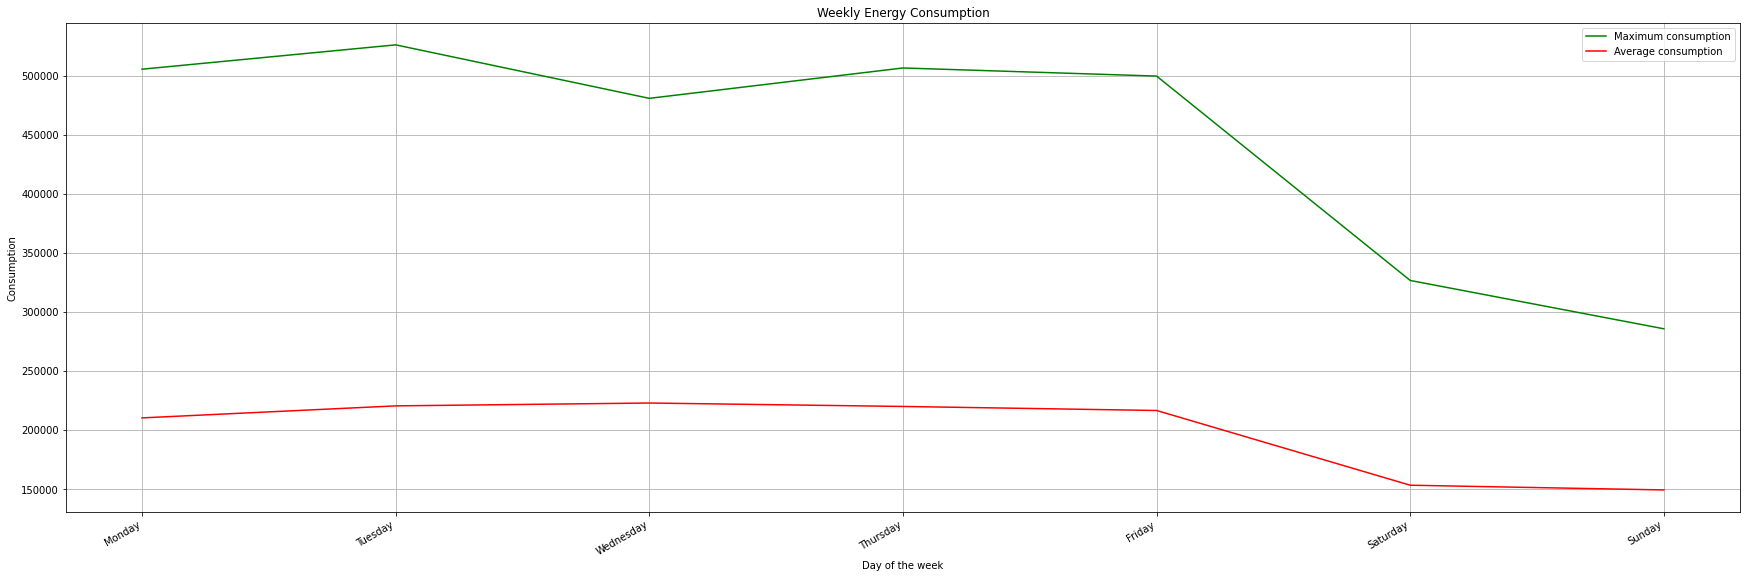

In [336]:
# function to plot the first week 
def plot_weekly_consumption():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df["Value"].groupby(df["Day_of_week"]).max().index, df["Value"].groupby(df["Day_of_week"]).max().values, color= "g", label= "Maximum consumption")
    ax.plot(df["Value"].groupby(df["Day_of_week"]).mean().index, df["Value"].groupby(df["Day_of_week"]).mean().values, color= "r", label= "Average consumption")
    #ax.plot(df["Value"].groupby(df["Day_of_week"]).min().index, df["Value"].groupby(df["Day_of_week"]).min().values, color= "b", label= "Minimum consumption")
    ax.set_title('Weekly Energy Consumption')
    ax.set_xlabel('Day of the week')
    ax.set_ylabel('Consumption')
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    plt.show()

plot_weekly_consumption()

In [337]:
#add a column to datafame with 1 if it is a weekend day and 0 if it is a weekday
df['Weekend'] = df['Date'].dt.dayofweek.isin([5,6]).astype(int)
df.tail()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Irradiance,Temperature,Weekend
389701,2022-11-13 23:56:00,97817.538,2022,11,13,6,23,56,96.0,11.3,1
389702,2022-11-13 23:57:00,97344.145,2022,11,13,6,23,57,96.0,11.3,1
389703,2022-11-13 23:58:00,96617.403,2022,11,13,6,23,58,96.0,11.3,1
389704,2022-11-13 23:59:00,96638.174,2022,11,13,6,23,59,96.0,11.3,1
389705,2022-11-14 00:00:00,99724.063,2022,11,14,0,0,0,96.0,11.3,0


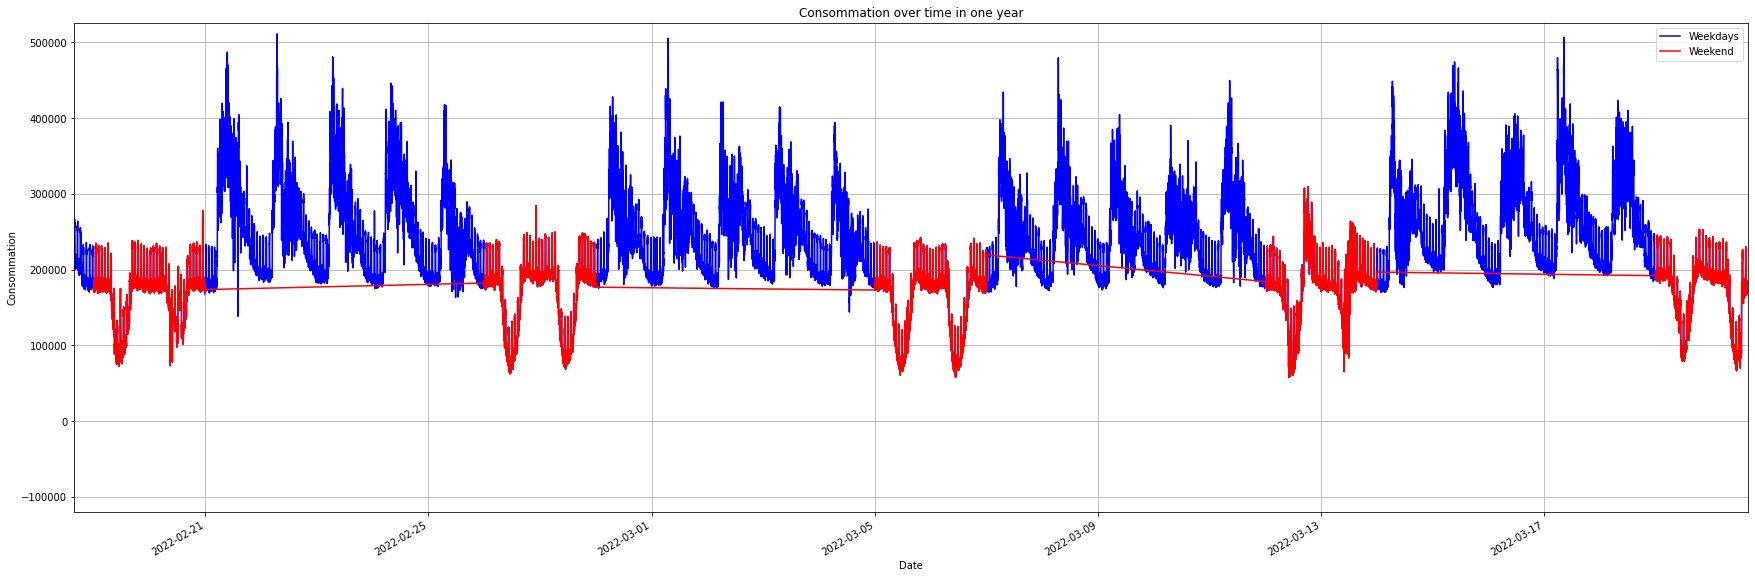

In [338]:
#function to plot the value with another color for the weekend days 
def plot_consommation_over_time_weekend():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Weekdays")
    ax.plot(df[df['Weekend'] == 1]['Date'], df[df['Weekend'] == 1]['Value'], color='red', label= "Weekend")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min() + pd.Timedelta(days=30))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    ax.legend()
    plt.show()
plot_consommation_over_time_weekend()

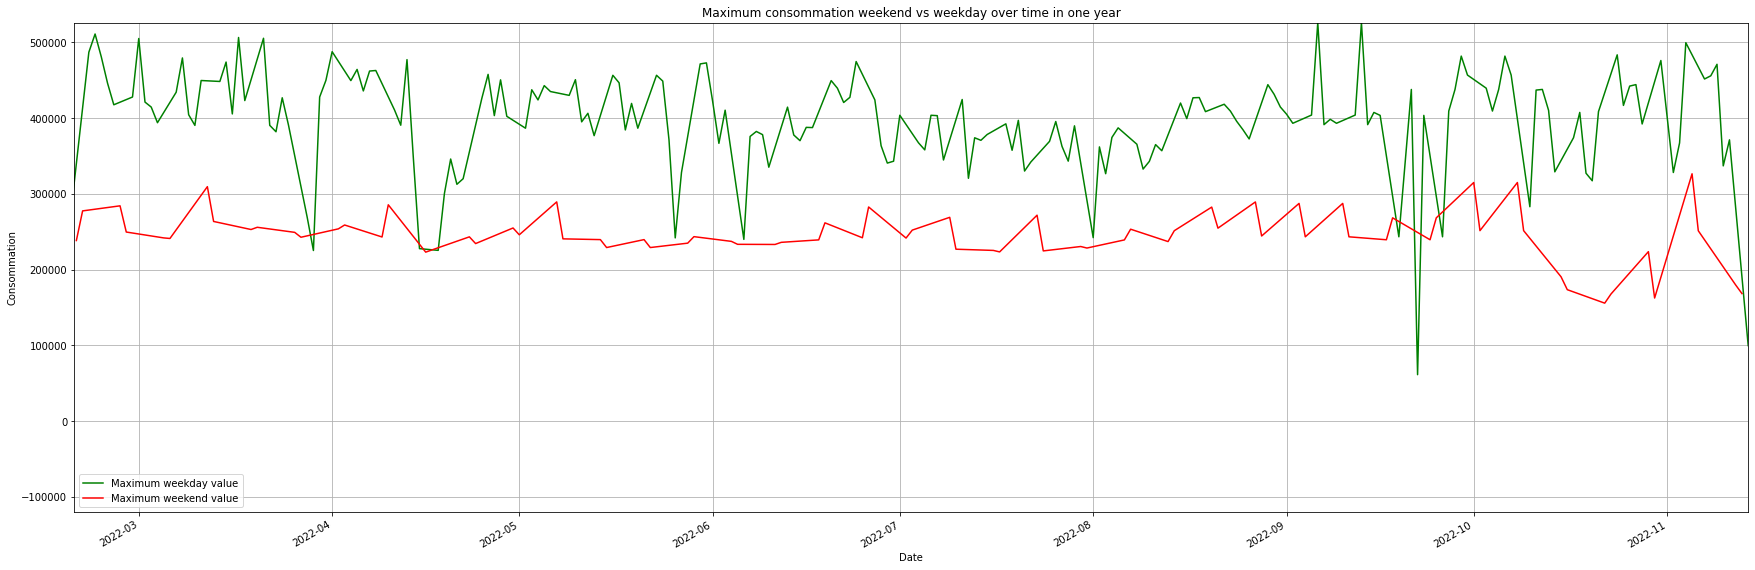

In [339]:
def plot_consommation_over_time_weekend_vs_weekday():
    fig, ax = plt.subplots(figsize=(30, 10))
    #ax.plot(df['Date'], df['Value'], color='blue')
    #ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red')
    ax.plot(df[df['Weekend'] == 0].groupby(df['Date'].dt.date)['Value'].max(), color='green', label="Maximum weekday value")
    ax.plot(df[df['Weekend'] == 1].groupby(df['Date'].dt.date)['Value'].max(), color='red', label="Maximum weekend value")
    ax.set_title('Maximum consommation weekend vs weekday over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_weekend_vs_weekday()

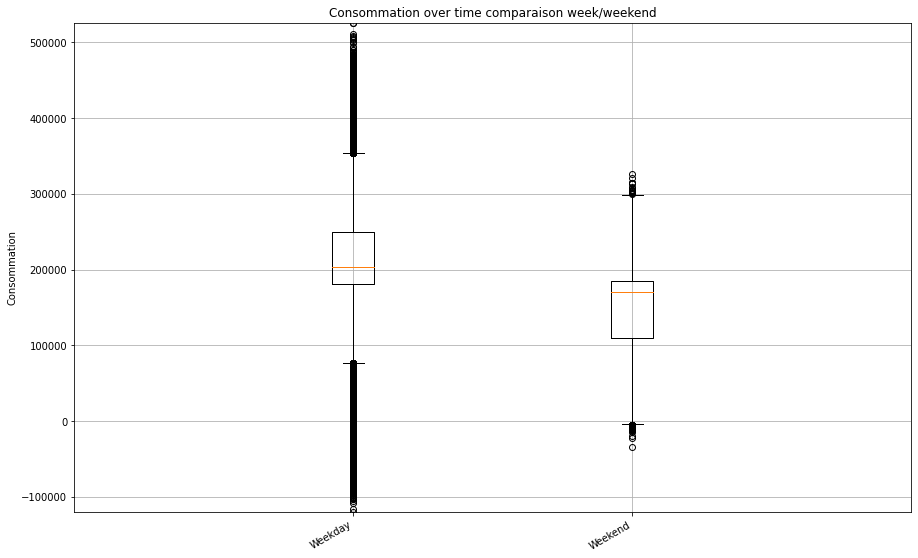

In [340]:
def plot_consommation_over_time_weekend_boxplot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df['Weekend'] == 0]['Value'], df[df['Weekend'] == 1]['Value']])
    ax.set_title('Consommation over time comparaison week/weekend')
    ax.set_ylabel('Consommation')
    ax.set_xlim(0, 3)
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    plt.xticks([1, 2], ['Weekday', 'Weekend'])
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_weekend_boxplot()

## Winter vs Summer

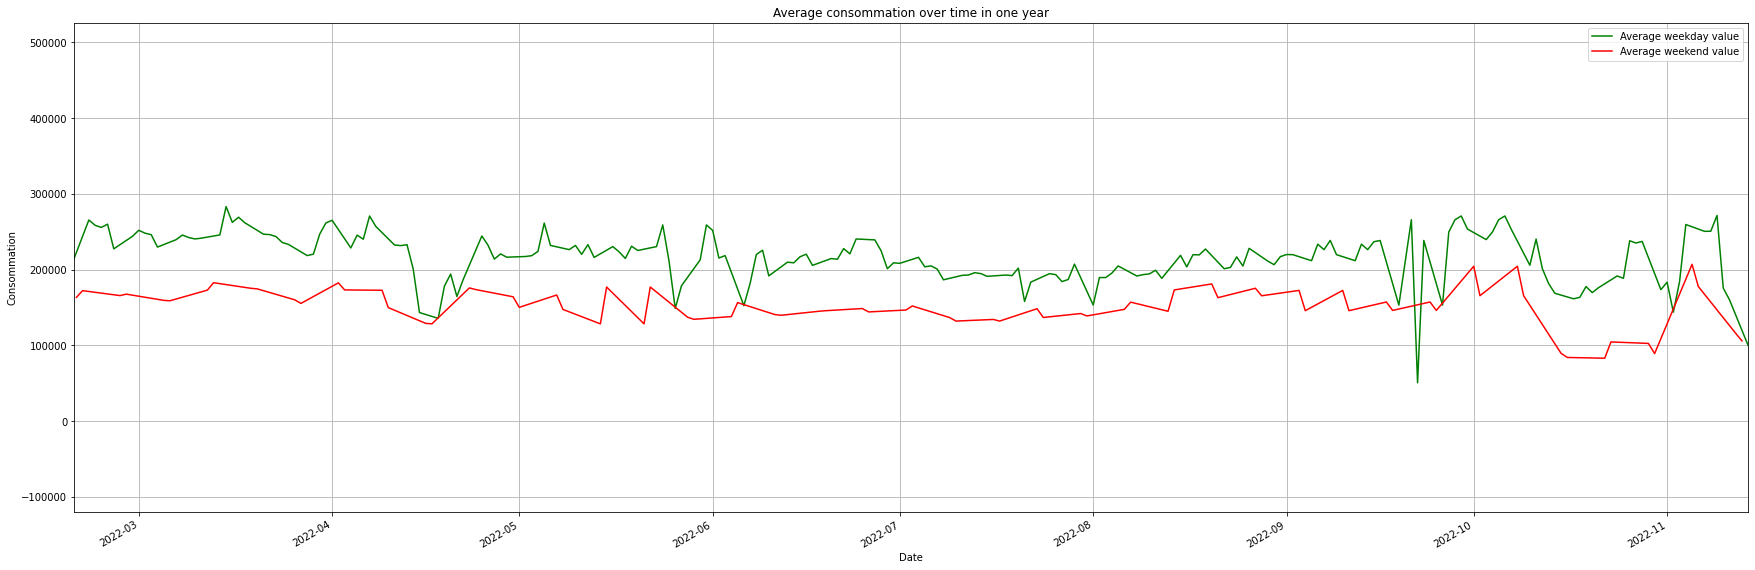

In [341]:
def plot_consommation_over_time_winter_peak():
    fig, ax = plt.subplots(figsize=(30, 10))
    #ax.plot(df['Date'], df['Value'], color='blue')
    #ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red')
    ax.plot(df[df['Weekend'] == 0].groupby(df['Date'].dt.date)['Value'].mean(), color='green', label="Average weekday value")
    ax.plot(df[df['Weekend'] == 1].groupby(df['Date'].dt.date)['Value'].mean(), color='red', label="Average weekend value")
    ax.set_title('Average consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_winter_peak()

In [342]:
# winter 1 and summer 0
df['Winter'] = df['Date'].dt.month.isin([11,12,1,2,3]).astype(int)
df.tail()
df.sort_values(by='Date', inplace=True)

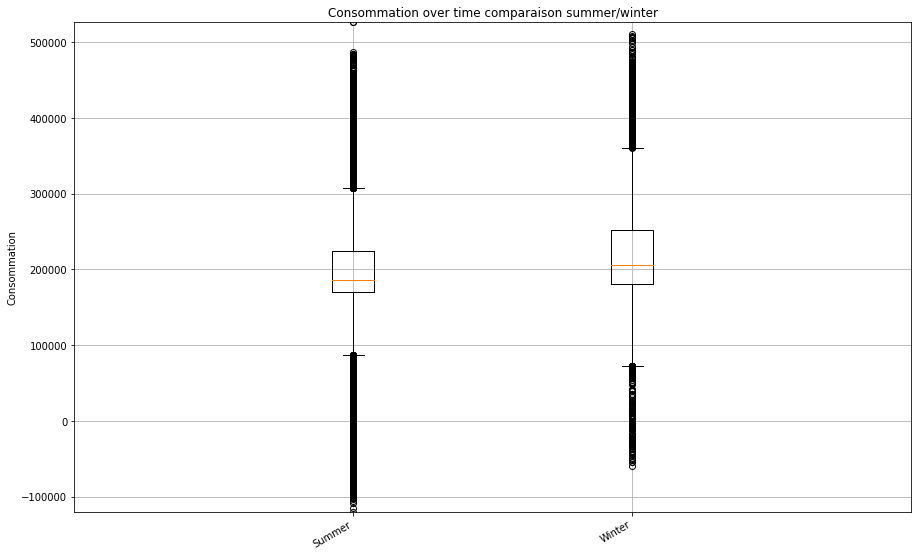

In [343]:
def plot_consommation_over_time_winter_boxplot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df['Winter'] == 0]['Value'], df[df['Winter'] == 1]['Value']])
    ax.set_title('Consommation over time comparaison summer/winter')
    ax.set_ylabel('Consommation')
    ax.set_xlim(0, 3)
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    plt.xticks([1, 2], ['Summer', 'Winter'])
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_winter_boxplot()

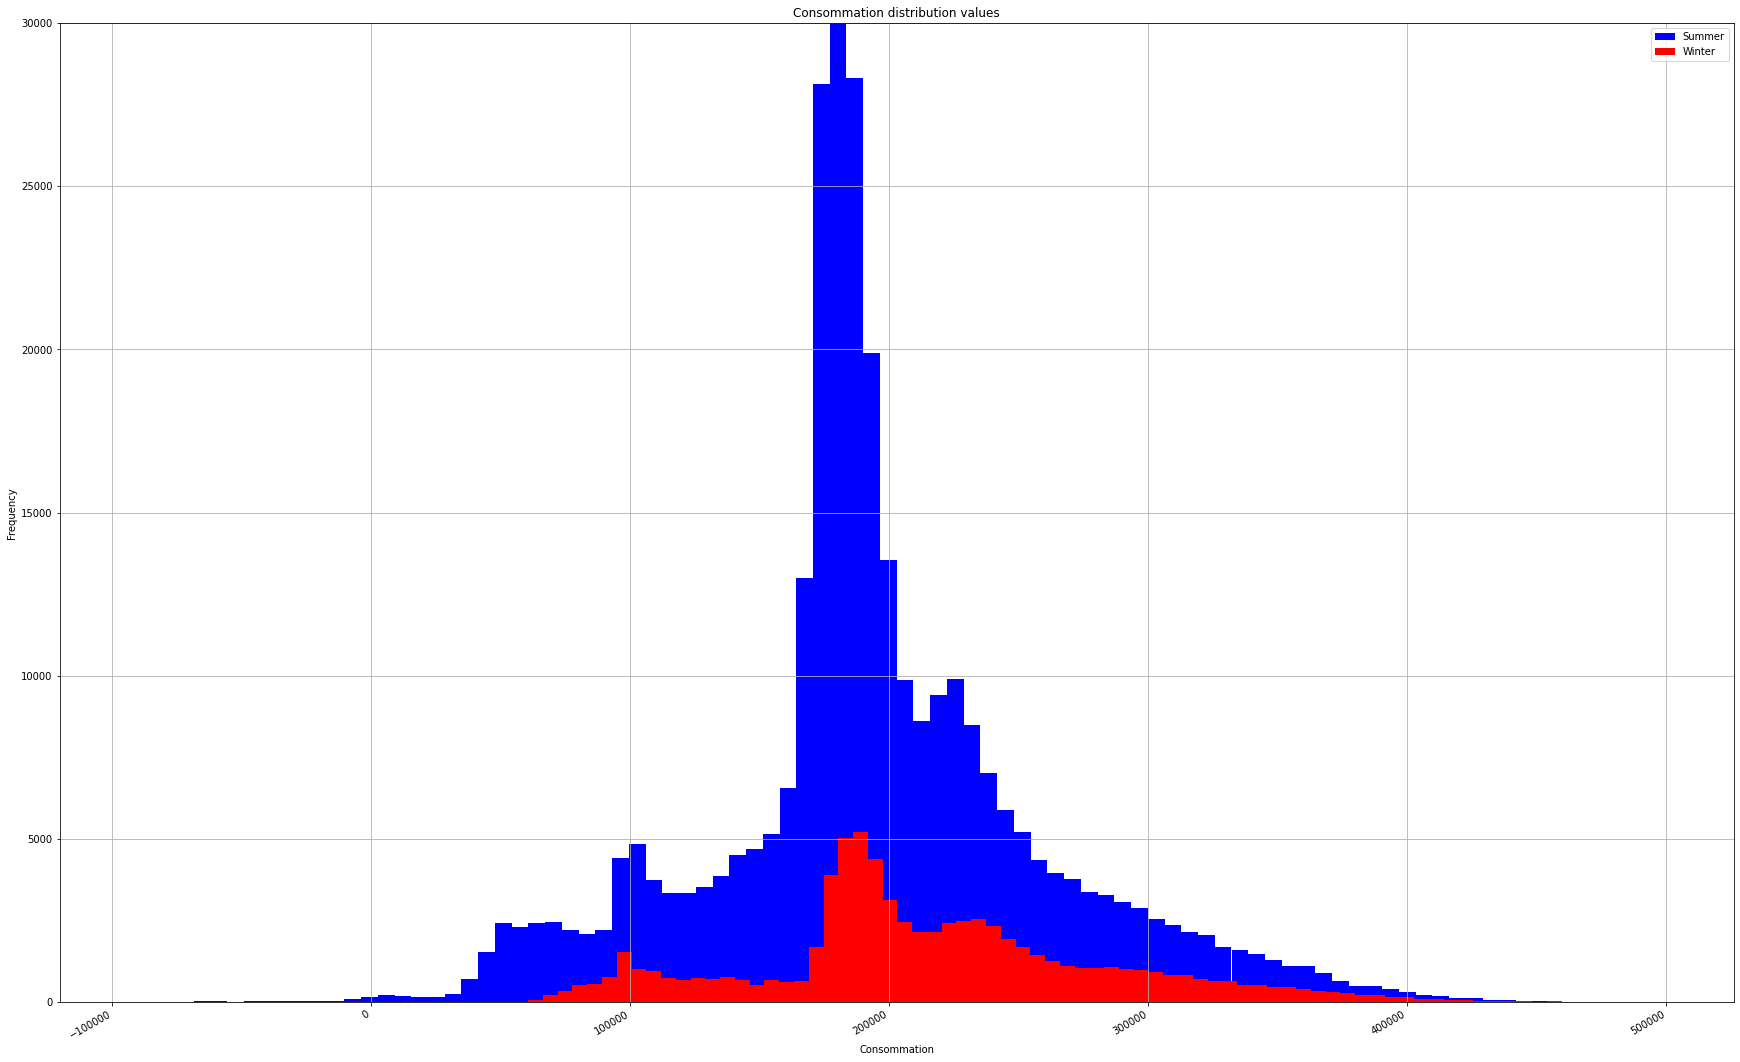

In [344]:
def plot_consommation_over_time_winter_distribution():
    fig, ax = plt.subplots(figsize=(30, 20))
    ax.hist(df[df['Winter'] == 0]['Value'], bins=100, color='blue', label= "Summer")
    ax.hist(df[df['Winter'] == 1]['Value'], bins=100, color='red', label= "Winter")
    ax.set_title('Consommation distribution values')
    ax.set_xlabel('Consommation')
    ax.set_ylabel('Frequency')
    ax.set_xlim(df['Value'].min(), df['Value'].max())
    ax.set_ylim(0, 30000)
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_winter_distribution()

## Working hours vs Free hours vs Transition morning vs Transition evening

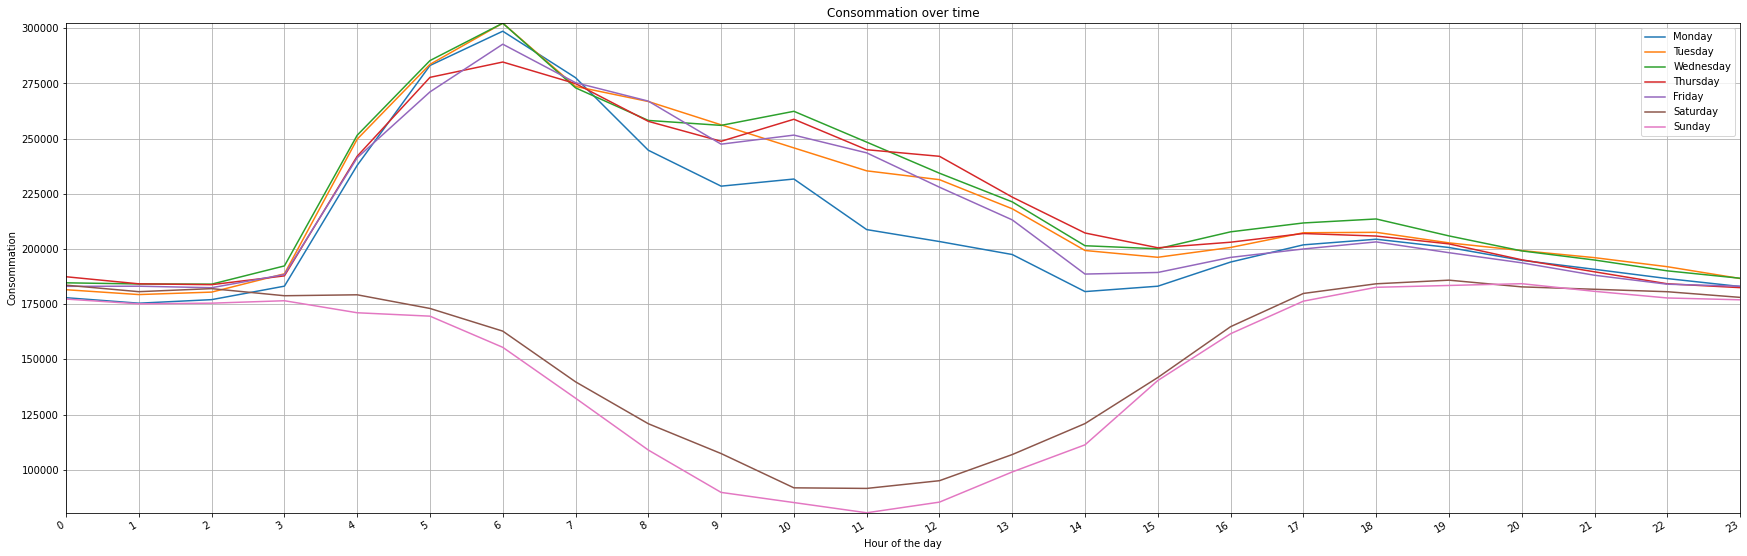

In [345]:

fig, ax = plt.subplots(figsize=(30, 10))

# I want to groupby the day of the week and the hour of the day
# I can't do it directly with the date column, so I create a new column
# with the day of the week and the hour of the day
df['Day of the week'] = df['Date'].dt.dayofweek
df['Hour of the day'] = df['Date'].dt.hour

# I groupby the day of the week and the hour of the day
# and I compute the mean of the value
df_grouped = df.groupby(['Day of the week', 'Hour of the day'])['Value'].mean()
df_grouped = df_grouped.reset_index()

# I plot the mean of the value for each day of the week
for day in range(7):
    ax.plot(df_grouped[df_grouped['Day of the week'] == day]['Hour of the day'], df_grouped[df_grouped['Day of the week'] == day]['Value'], label=day)

ax.set_title('Consommation over time')
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Consommation')
ax.set_xlim(df_grouped['Hour of the day'].min(), df_grouped['Hour of the day'].max())
ax.set_ylim(df_grouped['Value'].min(), df_grouped['Value'].max())
#I want a more detailed x axis
ax.set_xticks(range(24))

ax.grid(True)
# for the legend, I want to display the day of the week
# I use the calendar module to get the day of the week
import calendar
ax.legend([calendar.day_name[day] for day in range(7)])
fig.autofmt_xdate()

plt.show()




In [346]:
df['Working hour'] = ((df['Date'].dt.hour >= 6) & (df['Date'].dt.hour < 15)).astype(int)
df['Transition morning'] = ((df['Date'].dt.hour >= 3) & (df['Date'].dt.hour < 6)).astype(int)
df['Transition evening'] = ((df['Date'].dt.hour >= 15) & (df['Date'].dt.hour < 19)).astype(int)

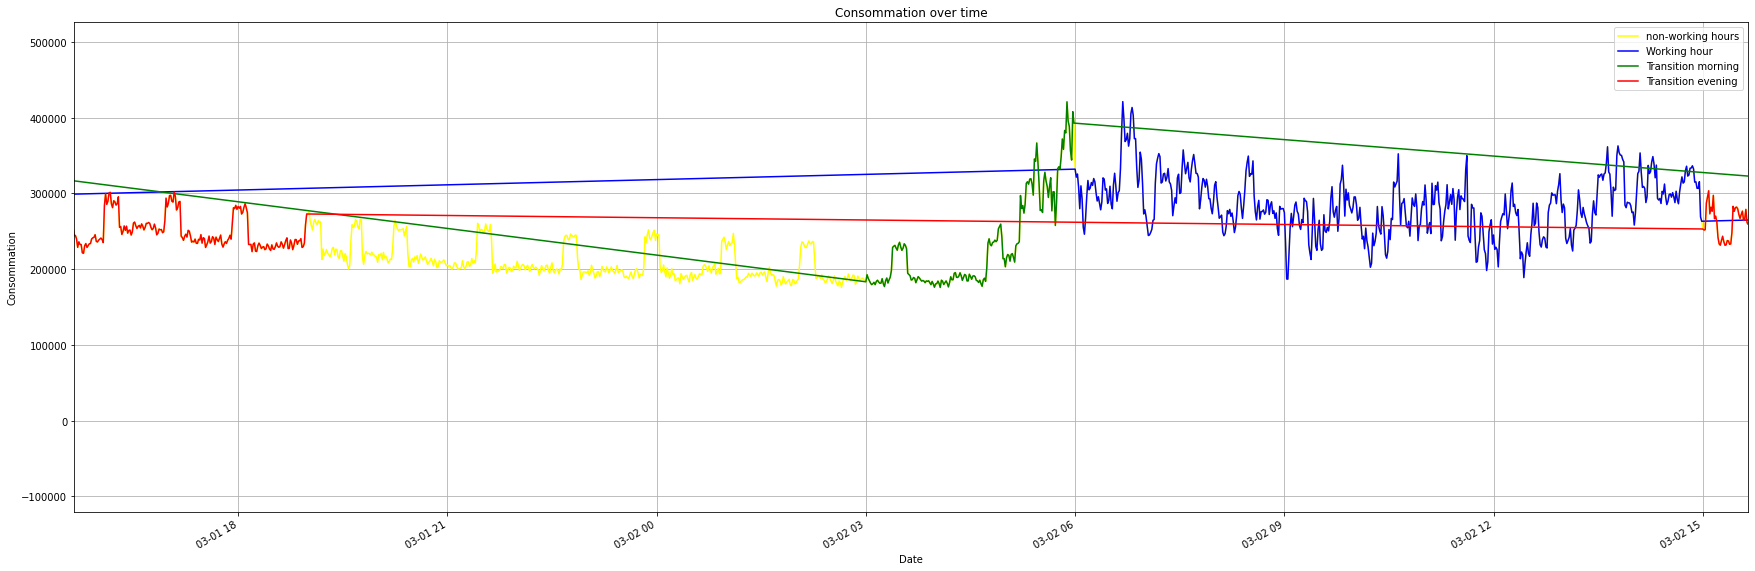

In [347]:
# plot the consommation over time
def plot_day(x):
    fig, ax = plt.subplots(figsize=(30, 10))
    #use a different color for the working hour, transition morning and transition evening
    ax.plot(df['Date'], df['Value'], color='yellow', label='non-working hours')
    ax.plot(df[df['Working hour'] == 1]['Date'], df[df['Working hour'] == 1]['Value'], color='blue', label='Working hour')
    ax.plot(df[df['Transition morning'] == 1]['Date'], df[df['Transition morning'] == 1]['Value'], color='green', label='Transition morning')
    ax.plot(df[df['Transition evening'] == 1]['Date'], df[df['Transition evening'] == 1]['Value'], color='red', label='Transition evening')
    

    ax.set_title('Consommation over time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    # I want to choose the day to be plotted

    ax.set_xlim(df['Date'].min() + pd.DateOffset(days=x), df['Date'].min()+ pd.DateOffset(days=x+1))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()

    plt.show()

plot_day(11)


## Holiday Feature

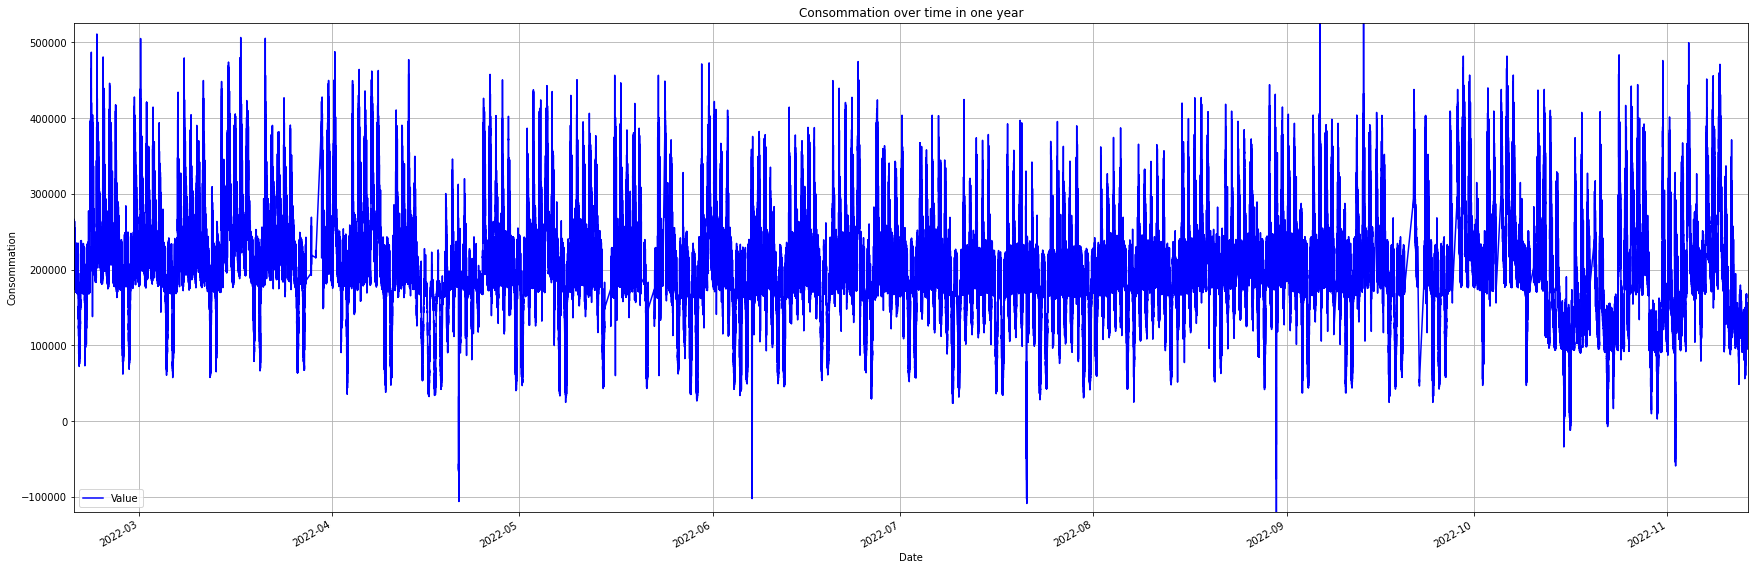

In [348]:
#plot value over time
def plot_consommation_over_time():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Value")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time()

In [349]:
#add a column holiday 1 between 2022-04-20 and 2022-04-28  and specific date 1/08/2022  0 otherwise
df['Holiday'] = (((df['Date'] >= '2022-04-15') & (df['Date'] <= '2022-04-25')) | ((df['Date'] >= '2022-08-01') & (df['Date'] <= '2022-08-01')) | ((df['Date'] >= '2022-09-20') & (df['Date'] <= '2022-09-20')) | ((df['Date'] >= '2022-12-24') & (df['Date'] <= '2022-09-25')) ).astype(int)

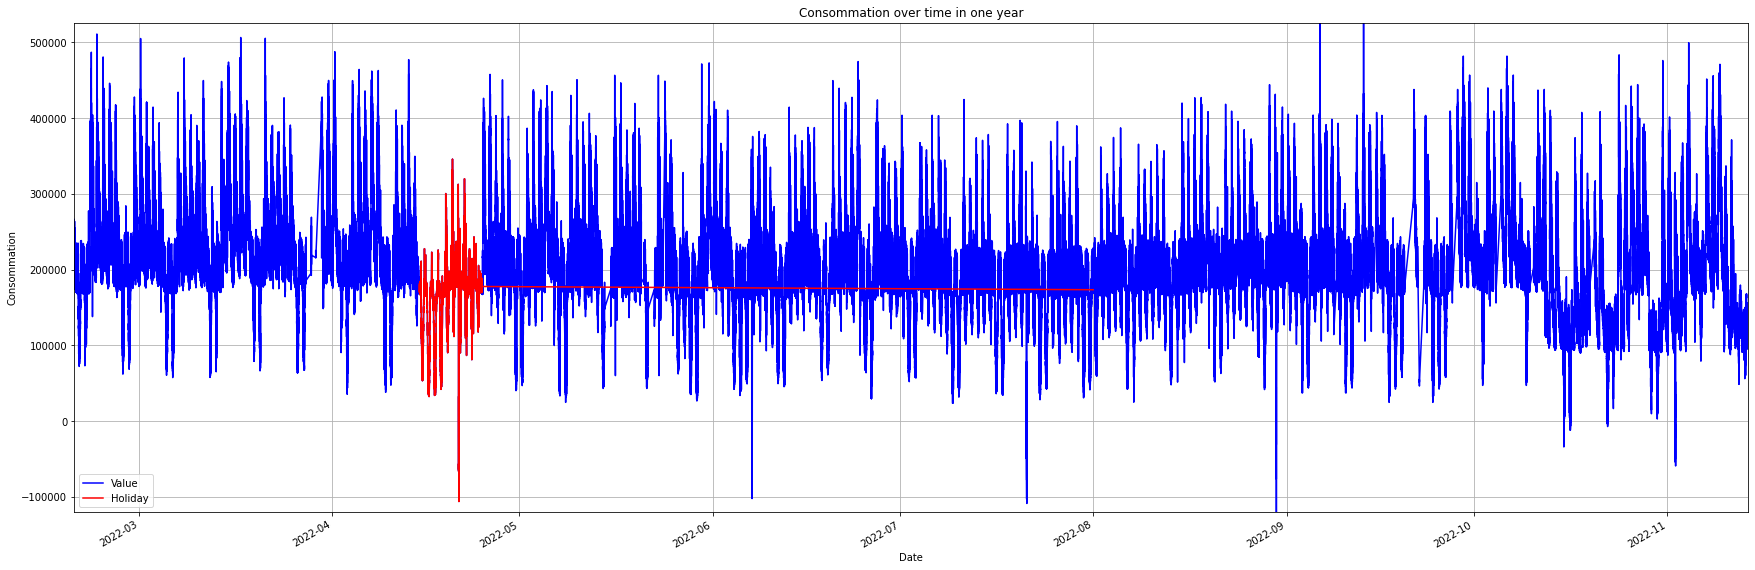

In [350]:
#plot value over time with holidays in anotehr color
def plot_consommation_over_time_holiday():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Value")
    ax.plot(df[df['Holiday'] == 1]['Date'], df[df['Holiday'] == 1]['Value'], color='red', label= "Holiday")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_holiday()

In [351]:
df['Normalized'] = (df['Value'] - df['Value'].mean()) / df['Value'].var()

In [352]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Irradiance,Temperature,Weekend,Winter,Day of the week,Hour of the day,Working hour,Transition morning,Transition evening,Holiday,Normalized
0,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,134.0,12.8,0,1,4,15,0,0,1,0,0.000003
1,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,134.0,12.8,0,1,4,15,0,0,1,0,0.000004
2,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,134.0,12.8,0,1,4,15,0,0,1,0,0.000005
3,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,134.0,12.8,0,1,4,15,0,0,1,0,0.000005
4,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,134.0,12.8,0,1,4,15,0,0,1,0,0.000005


## Pattern


In [353]:
df['Peak']=0
#if normalized value is greater than 0.3 but smaller than 1, it is a peak but for non working hours
df.loc[(df['Normalized'] > 0.000003) & (df['Normalized'] < 0.00002) & (df['Working hour'] == 0) & (df['Transition evening'] == 0), 'Peak'] = 1

In [354]:
#plot the value with another color for the peak values
def plot_consommation_over_time_peak():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Normalized'], color='blue', label= "Value")
    ax.plot(df[df['Peak'] == 1]['Date'], df[df['Peak'] == 1]['Normalized'], color='red', label= "Peak")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min()+ pd.Timedelta(days=10))
    ax.set_ylim(df['Normalized'].min(), df['Normalized'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_peak()


KeyboardInterrupt: 

## Generate Cycle for Dates

In [ ]:
def generate_cycle(array, nb_div):
    re_part = np.ones(len(array))
    im_part = np.ones(len(array))

    for k in range(len(array)):
        z = np.exp(array[k]*2j*np.pi/nb_div)
        re_part[k] = np.real(z)
        im_part[k] = np.imag(z)

    return re_part, im_part

In [ ]:
def plot_cycle(re_part, im_part, title):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.plot(re_part, im_part, '+')
    ax.set_title(title)
    ax.set_xlabel('Real Part')
    ax.set_ylabel('Imaginary Part')
    ax.grid(True)
    plt.show()

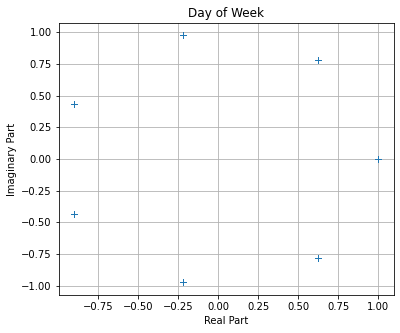

In [ ]:
day_of_week_re, day_of_week_im = generate_cycle(df['Day_of_week'].to_numpy(), 7)
plot_cycle(day_of_week_re, day_of_week_im, 'Day of Week')

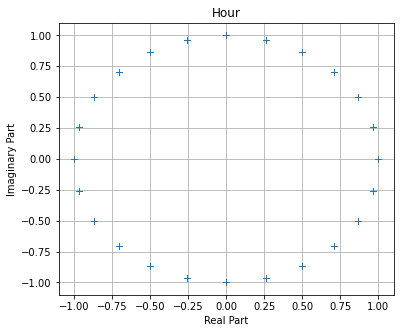

In [ ]:
hour_re, hour_im = generate_cycle(df['Hour'].to_numpy(), 24)
plot_cycle(hour_re, hour_im, 'Hour')

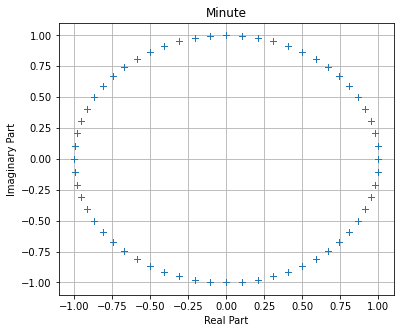

In [ ]:
minute_re, minute_im = generate_cycle(df['Minute'].to_numpy(), 60)
plot_cycle(minute_re, minute_im, 'Minute')

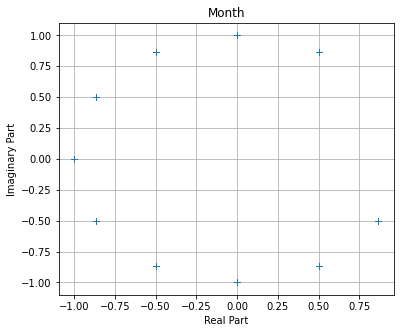

In [ ]:
month_re, month_im = generate_cycle(df['Month'].to_numpy(), 12)
plot_cycle(month_re, month_im, 'Month')

In [ ]:
def generate_cycle_days(days, months, year):
    re_part = np.ones(len(days))
    im_part = np.ones(len(days))

    lst_31 = [1, 3, 5, 7, 8, 10, 12] # Months with 31 days
    lst_30 = [4, 6, 9, 11] # Months with 30 days

    for k in range(len(days)):
        if months[k] in lst_31:
            nb_div = 31
        elif months[k] in lst_30:
            nb_div = 30
        elif months[k] == 2:
            if (year[k]%4==0 and year[k]%100!=0 or year[k]%400==0):
                nb_div = 29
            else:
                nb_div = 29
        else: 
            print('Error in Months')
            break

        z = np.exp(days[k]*2j*np.pi/nb_div)
        re_part[k] = np.real(z)
        im_part[k] = np.imag(z)

    return re_part, im_part

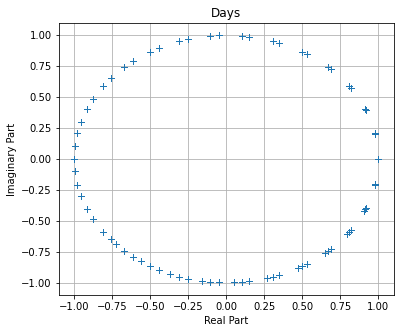

In [ ]:
days_re, days_im = generate_cycle_days(df['Day'].to_numpy(), df['Month'].to_numpy(), df['Year'].to_numpy())
plot_cycle(days_re, days_im, 'Days')

In [ ]:
param = list(set(list(df.columns)) - set(['Second', 'Year', 'Normalized']))
new_df = df[param]
new_df = new_df.assign(Day_of_Week_re=day_of_week_re.tolist())
new_df = new_df.assign(Day_of_Week_im=day_of_week_im.tolist())
new_df = new_df.assign(Hour_re=hour_re.tolist())
new_df = new_df.assign(Hour_im=hour_im.tolist())
new_df = new_df.assign(Minute_re=minute_re.tolist())
new_df = new_df.assign(Minute_im=minute_im.tolist())
new_df = new_df.assign(Month_re=month_re.tolist())
new_df = new_df.assign(Month_im=month_im.tolist())
new_df = new_df.assign(Day_re=days_re.tolist())
new_df = new_df.assign(Day_im=days_im.tolist())

#new_df['Day_of_week']= new_df['Day_of_week']/7


new_df.head()

,Winter,Peak,Weekend,Value,Hour,Hour of the day,Transition evening,Working hour,Irradiance,Date,Minute,Day,Holiday,Month,Temperature,Day of the week,Transition morning,Day_of_week,Day_of_Week_re,Day_of_Week_im,Hour_re,Hour_im,Minute_re,Minute_im,Month_re,Month_im,Day_re,Day_im
0,1,0,0,212141.645,15,15,1,0,134.0,2022-02-18 15:39:00,39,18,0,2,12.8,4,0,4,-0.900969,-0.433884,-0.707107,-0.707107,-0.587785,-0.809017,0.5,0.866025,-0.725995,-0.687699
1,1,0,0,216980.618,15,15,1,0,134.0,2022-02-18 15:40:00,40,18,0,2,12.8,4,0,4,-0.900969,-0.433884,-0.707107,-0.707107,-0.500000,-0.866025,0.5,0.866025,-0.725995,-0.687699
2,1,0,0,219702.692,15,15,1,0,134.0,2022-02-18 15:41:00,41,18,0,2,12.8,4,0,4,-0.900969,-0.433884,-0.707107,-0.707107,-0.406737,-0.913545,0.5,0.866025,-0.725995,-0.687699
3,1,0,0,218002.962,15,15,1,0,134.0,2022-02-18 15:42:00,42,18,0,2,12.8,4,0,4,-0.900969,-0.433884,-0.707107,-0.707107,-0.309017,-0.951057,0.5,0.866025,-0.725995,-0.687699
4,1,0,0,219366.764,15,15,1,0,134.0,2022-02-18 15:43:00,43,18,0,2,12.8,4,0,4,-0.900969,-0.433884,-0.707107,-0.707107,-0.207912,-0.978148,0.5,0.866025,-0.725995,-0.687699


In [355]:
#drop Hour of the day
new_df = new_df.drop(['Hour of the day'], axis=1)
new_df = new_df.drop(['Day_of_week'], axis=1)
new_df = new_df.drop(['Day of the week'], axis=1)

In [356]:
new_df.head()

,Winter,Peak,Weekend,Value,Hour,Transition evening,Working hour,Irradiance,Date,Minute,Day,Holiday,Month,Temperature,Transition morning,Day_of_Week_re,Day_of_Week_im,Hour_re,Hour_im,Minute_re,Minute_im,Month_re,Month_im,Day_re,Day_im
0,1,0,0,212141.645,15,1,0,134.0,2022-02-18 15:39:00,39,18,0,2,12.8,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.587785,-0.809017,0.5,0.866025,-0.725995,-0.687699
1,1,0,0,216980.618,15,1,0,134.0,2022-02-18 15:40:00,40,18,0,2,12.8,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.500000,-0.866025,0.5,0.866025,-0.725995,-0.687699
2,1,0,0,219702.692,15,1,0,134.0,2022-02-18 15:41:00,41,18,0,2,12.8,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.406737,-0.913545,0.5,0.866025,-0.725995,-0.687699
3,1,0,0,218002.962,15,1,0,134.0,2022-02-18 15:42:00,42,18,0,2,12.8,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.309017,-0.951057,0.5,0.866025,-0.725995,-0.687699
4,1,0,0,219366.764,15,1,0,134.0,2022-02-18 15:43:00,43,18,0,2,12.8,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.207912,-0.978148,0.5,0.866025,-0.725995,-0.687699


## Windowing

In [369]:
#Add a column with the normalization using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df['Normalized'] = scaler.fit_transform(new_df[['Value']])

C:\Users\User\AppData\Local\Temp\ipykernel_17012\2907760814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Normalized'] = scaler.fit_transform(new_df[['Value']])


In [370]:
new_df.head()

,Winter,Peak,Weekend,Value,Hour,Transition evening,Working hour,Irradiance,Date,Minute,Day,Holiday,Month,Temperature,Transition morning,Day_of_Week_re,Day_of_Week_im,Hour_re,Hour_im,Minute_re,Minute_im,Month_re,Month_im,Day_re,Day_im,Normalized
0,1,0,0,212141.645,0.652174,1,0,0.117958,2022-02-18 15:39:00,0.661017,0.566667,0,0.0,0.451948,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.587785,-0.809017,0.5,0.866025,-0.725995,-0.687699,0.514366
1,1,0,0,216980.618,0.652174,1,0,0.117958,2022-02-18 15:40:00,0.677966,0.566667,0,0.0,0.451948,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.500000,-0.866025,0.5,0.866025,-0.725995,-0.687699,0.521853
2,1,0,0,219702.692,0.652174,1,0,0.117958,2022-02-18 15:41:00,0.694915,0.566667,0,0.0,0.451948,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.406737,-0.913545,0.5,0.866025,-0.725995,-0.687699,0.526065
3,1,0,0,218002.962,0.652174,1,0,0.117958,2022-02-18 15:42:00,0.711864,0.566667,0,0.0,0.451948,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.309017,-0.951057,0.5,0.866025,-0.725995,-0.687699,0.523435
4,1,0,0,219366.764,0.652174,1,0,0.117958,2022-02-18 15:43:00,0.728814,0.566667,0,0.0,0.451948,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.207912,-0.978148,0.5,0.866025,-0.725995,-0.687699,0.525545


In [ ]:
# Add a column with the value at the exact same time the day before

new_df['Yesterday'] = new_df['Normalized'].shift(24*60)

## Normalization

In [357]:
new_df['Temperature']= (new_df['Temperature'] - new_df['Temperature'].min()) / (new_df['Temperature'].max() - new_df['Temperature'].min())
new_df['Irradiance']= (new_df['Irradiance'] - new_df['Irradiance'].min()) / (new_df['Irradiance'].max() - new_df['Irradiance'].min())

new_df['Hour']= (new_df['Hour'] - new_df['Hour'].min()) / (new_df['Hour'].max() - new_df['Hour'].min())
new_df['Month']= (new_df['Month'] - new_df['Month'].min()) / (new_df['Month'].max() - new_df['Month'].min())
new_df['Minute']= (new_df['Minute'] - new_df['Minute'].min()) / (new_df['Minute'].max() - new_df['Minute'].min())
new_df['Day']= (new_df['Day'] - new_df['Day'].min()) / (new_df['Day'].max() - new_df['Day'].min())

# Modeling with ANN

In [358]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [367]:
# crop new_df from the beginning to 2022-09-15 00:00:00 using column date
new_df = new_df[new_df['Date'] < '2022-09-15 00:00:00']


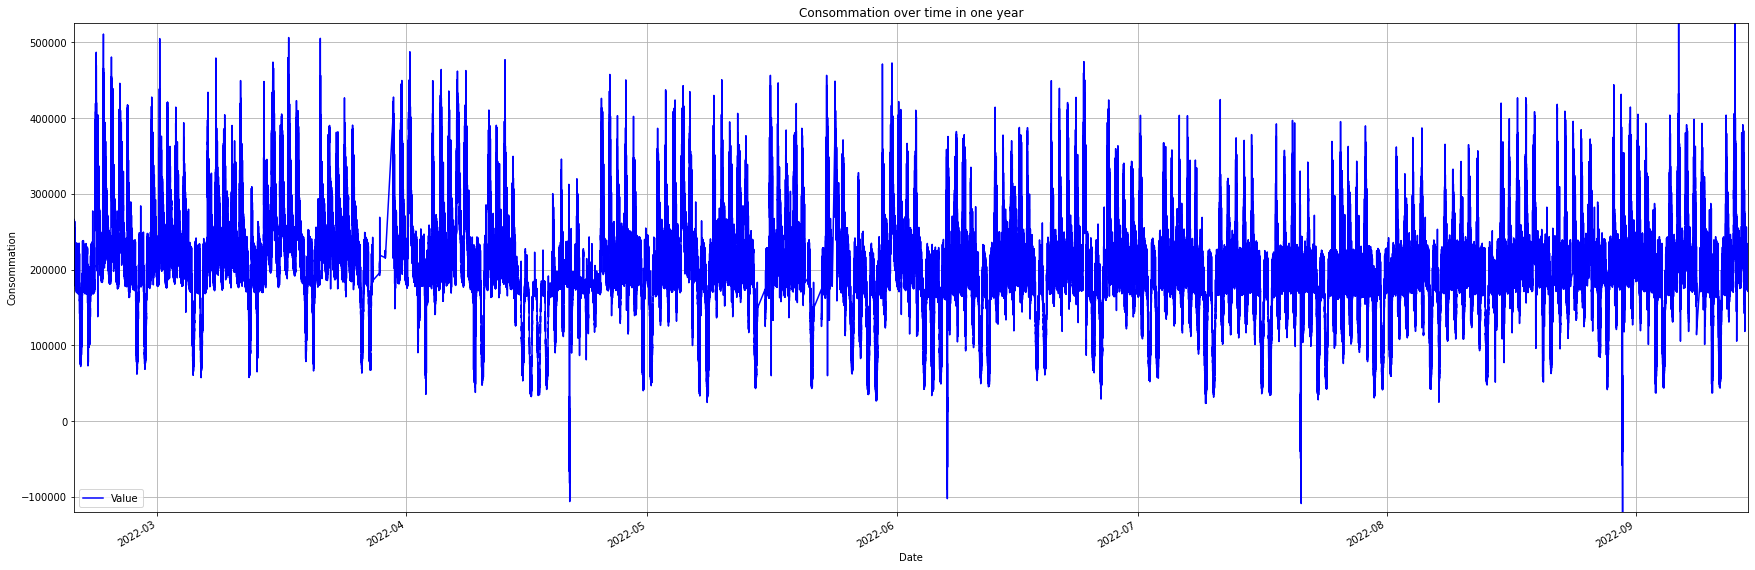

In [368]:
#plot value over time
def plot_consommation_over_time():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(new_df['Date'], new_df['Value'], color='blue', label= "Value")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(new_df['Date'].min(), new_df['Date'].max())
    ax.set_ylim(new_df['Value'].min(), new_df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time()

In [359]:
target_column = ['Value']
predictors = list(set(list(new_df.columns)) - set(target_column))


X = new_df[predictors]
y = new_df[target_column]
# Split into 70% train and 30% test not random to keep the time order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [360]:
#create new datafram X_train and X-test without column date
X_train_ = X_train.drop(['Date'], axis=1)
X_test_ = X_test.drop(['Date'], axis=1)

In [361]:
X_train_.head()

,Month_re,Minute_im,Winter,Peak,Weekend,Hour_im,Hour,Minute_re,Day_of_Week_im,Transition evening,Irradiance,Working hour,Hour_re,Day_re,Minute,Day,Holiday,Day_im,Month,Temperature,Month_im,Transition morning,Day_of_Week_re
0,0.5,-0.809017,1,0,0,-0.707107,0.652174,-0.587785,-0.433884,1,0.117958,0,-0.707107,-0.725995,0.661017,0.566667,0,-0.687699,0.0,0.451948,0.866025,0,-0.900969
1,0.5,-0.866025,1,0,0,-0.707107,0.652174,-0.500000,-0.433884,1,0.117958,0,-0.707107,-0.725995,0.677966,0.566667,0,-0.687699,0.0,0.451948,0.866025,0,-0.900969
2,0.5,-0.913545,1,0,0,-0.707107,0.652174,-0.406737,-0.433884,1,0.117958,0,-0.707107,-0.725995,0.694915,0.566667,0,-0.687699,0.0,0.451948,0.866025,0,-0.900969
3,0.5,-0.951057,1,0,0,-0.707107,0.652174,-0.309017,-0.433884,1,0.117958,0,-0.707107,-0.725995,0.711864,0.566667,0,-0.687699,0.0,0.451948,0.866025,0,-0.900969
4,0.5,-0.978148,1,0,0,-0.707107,0.652174,-0.207912,-0.433884,1,0.117958,0,-0.707107,-0.725995,0.728814,0.566667,0,-0.687699,0.0,0.451948,0.866025,0,-0.900969


In [319]:
#reg_all = MLPRegressor(hidden_layer_sizes=(200, 200, 200), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=400, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#reg_all.fit(X_train_, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [415]:
#hypertune the parameters of the MLP regressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error




In [416]:
# Create the parameter grid based on the results of random search
param_grid = {
    'hidden_layer_sizes': [(300, 300, 300), (200, 200, 200), (100, 100, 100), (50, 50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.0001],
    'max_iter': [400, 500, 600]
}


In [417]:
# Create a based model
mlp = MLPRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 2)


In [418]:
# Fit the grid search to the data
grid_search.fit(X_train_, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [ ]:
# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_search.best_score_)))  



In [136]:
y_pred = reg_all.predict(X_test_)

NameError: name 'reg_all' is not defined

In [312]:
y_test_=y_test
y_pred_=y_pred

In [313]:
# add a column with the date taken from X_test to y_test_ and make sure the date is in the right order
y_test_['Date'] = X_test['Date']
#y_test_ = y_test_.sort_values(by=['Date'])
y_test_.head()
#add a column with the value predicted Y_pred_ to y_test_
y_test_['Value_pred'] = y_pred_
y_test_.head()

,Value,Date,Value_pred
272794,242286.803,2022-08-18 09:50:00,232558.951934
272795,248719.098,2022-08-18 09:51:00,232179.037852
272796,235504.505,2022-08-18 09:52:00,231823.728060
272797,239468.349,2022-08-18 09:53:00,231446.648697
272798,227288.291,2022-08-18 09:54:00,231064.979366


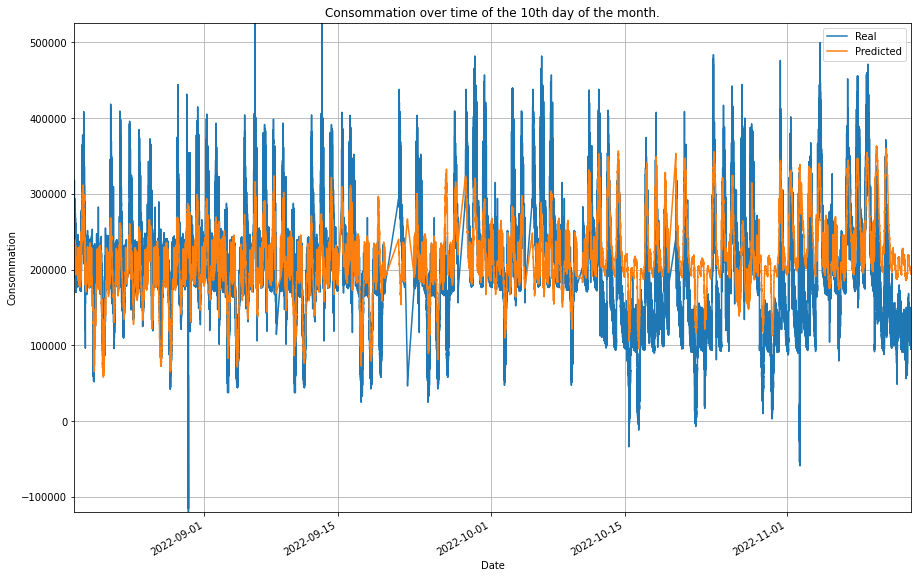

In [314]:
#plot the real value and the predicted value
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(y_test_['Date'], y_test_['Value'], label='Real')
ax.plot(y_test_['Date'], y_test_['Value_pred'], label='Predicted')
ax.set_title("Consommation over time of the 10th day of the month.")
ax.set_xlabel('Date')
ax.set_ylabel('Consommation')
ax.set_xlim(y_test_['Date'].min(), y_test_['Date'].max())
ax.set_ylim(y_test_['Value'].min(), y_test_['Value'].max())
ax.grid(True)
ax.legend()
fig.autofmt_xdate()
plt.show()

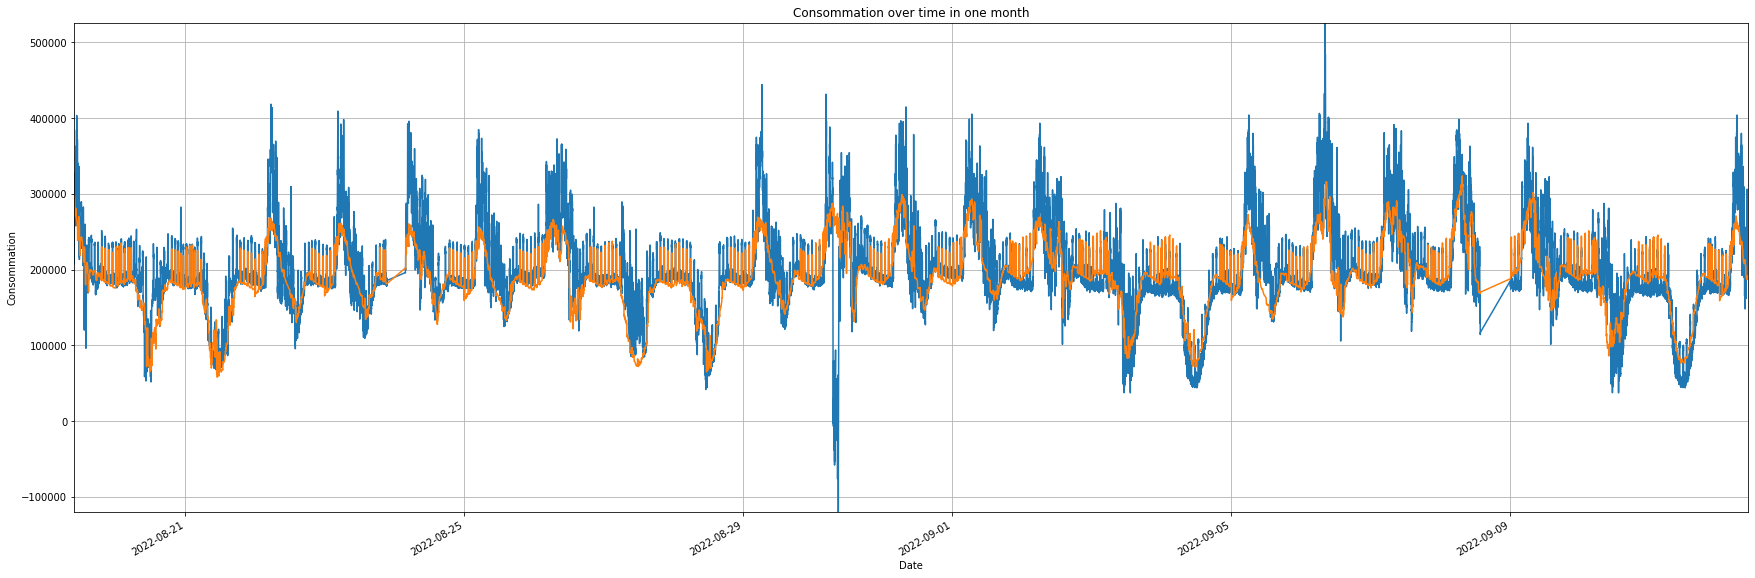

In [318]:
def plot_consommation_over_time_zoomed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))
    
    ax.plot(y_test_['Date'], y_test_['Value'], label='Real')
    ax.plot(y_test_['Date'], y_test_['Value_pred'], label='Predicted')
    ax.set_title('Consommation over time in one month')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    
    ax.set_xlim(y_test_['Date'].min()+ pd.Timedelta(days=1) , y_test_['Date'].min()+ pd.Timedelta(days=25))
    ax.set_ylim(y_test_['Value'].min(), y_test_['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_zoomed_graph()